# Synthetic Resampling

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## Generate an imbalanced data set

In [2]:
# Generate Data
X, y = make_blobs(n_samples=[5000, 50], random_state=1, cluster_std=7)

# Convert ndarray to pandas datatypes
X = pd.DataFrame(X)
y = pd.Series(y)

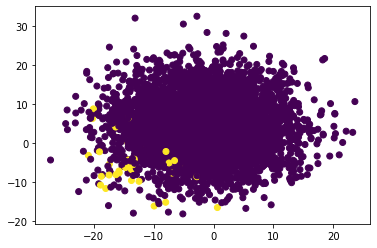

In [3]:
# Plot data
plt.scatter(
    x=X[0],
    y=X[1],
    c=y)
plt.show()

In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
# Count distinct values
y_train.value_counts()

0    3753
1      34
dtype: int64

---

## Cluster Centroids

In [6]:
# Import ClusterCentroids from imblearn
from imblearn.under_sampling import ClusterCentroids

# Create an instance of ClusterCentroids
cc = ClusterCentroids(random_state=1)

# Fit the cluster centroids model to the traning data
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)


In [7]:
# Count resampled values
y_resampled.value_counts()

1    34
0    34
dtype: int64

In [8]:
# Fit the RandomForestClassifier on the original data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Fit the RandomForestClassifier on the resampled data
model_resampled = RandomForestClassifier()
model_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [9]:
# Generate predictions based on the original data model
y_pred = model.predict(X_test)

# Generate predictions based on the resampled data model
y_pred_resampled = model_resampled.predict(X_test)

In [10]:
# Print classification reports
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1247
           1       0.00      0.00      0.00        16

    accuracy                           0.98      1263
   macro avg       0.49      0.50      0.50      1263
weighted avg       0.97      0.98      0.98      1263

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1247
           1       0.08      0.81      0.14        16

    accuracy                           0.87      1263
   macro avg       0.54      0.84      0.53      1263
weighted avg       0.99      0.87      0.92      1263



---

## SMOTE

In [11]:
# Import SMOTE from imblearn
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE model instance
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')

# Fit the SMOTE model to the training data
X_resampled, y_resampled = smote_sampler.fit_resample(X_train, y_train)

In [12]:
# Count resampled values
y_resampled.value_counts()

1    3753
0    3753
dtype: int64

In [13]:
# Fit the RandomForestClassifier on the original data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Fit random forest on resampled data
model_resampled = RandomForestClassifier()
model_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [14]:
# Generate predictions based on the original data model
y_pred = model.predict(X_test)

# Generate predictions based on the resampled data model
y_pred_resampled = model_resampled.predict(X_test)

In [15]:
# Print classification reports
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1247
           1       0.50      0.12      0.20        16

    accuracy                           0.99      1263
   macro avg       0.74      0.56      0.60      1263
weighted avg       0.98      0.99      0.98      1263

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1247
           1       0.06      0.44      0.10        16

    accuracy                           0.90      1263
   macro avg       0.52      0.67      0.53      1263
weighted avg       0.98      0.90      0.94      1263



---

## SMOTEENN

In [16]:
# Import SMOTEENN from imblearn
from imblearn.combine import SMOTEENN

# Instantiate an instance of the SMOTEENN model
smote_enn = SMOTEENN(random_state=1)

# Fit the SMOTEENN model to the training data
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [17]:
# Count distinct values
y_resampled.value_counts()

1    3167
0    3103
dtype: int64

In [18]:
# Fit the RandomForestClassifier on the original data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Fit the RandomForestClassifier on the resampled data
model_resampled = RandomForestClassifier()
model_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [19]:
# Generate predictions based on the original data model
y_pred = model.predict(X_test)

# Generate predictions based on the resampled data model
y_pred_resampled = model_resampled.predict(X_test)

In [20]:
# Print classification reports
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_resampled))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1247
           1       0.25      0.06      0.10        16

    accuracy                           0.99      1263
   macro avg       0.62      0.53      0.55      1263
weighted avg       0.98      0.99      0.98      1263

              precision    recall  f1-score   support

           0       0.99      0.90      0.95      1247
           1       0.08      0.62      0.13        16

    accuracy                           0.90      1263
   macro avg       0.53      0.76      0.54      1263
weighted avg       0.98      0.90      0.94      1263

